# Introduction
It's totally the simplest solution to trying to predict the number of infected people by COVID-19 on a few next days based on the historical data.  I use it for it exp function y(t)=a*exp(b*t).

## ETL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

df = pd.read_csv('poland_basic.csv', sep=';')
df['date'] = pd.to_datetime(df['date'])
df['day'] = range(1, len(df) + 1)
df.head()

,date,infected,day
0,2020-03-04,1,1
1,2020-03-05,1,2
2,2020-03-06,5,3
3,2020-03-07,6,4
4,2020-03-08,11,5


## Define prediction function 

In [2]:
def exp_func(x, a, b):
    return a * np.exp(b * x)

popt, pcov = curve_fit(exp_func, df['day'], df['infected'])

## Plot fitted function

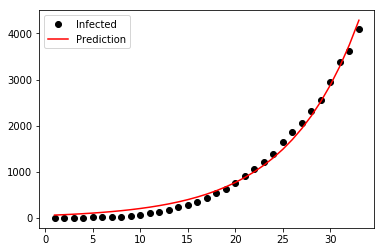

In [3]:
plt.figure()
plt.plot(df['day'], df['infected'], 'ko', label="Infected")
plt.plot(df['day'], exp_func(df['day'], *popt), 'r-', label="Prediction")
plt.legend()
plt.show()

y(t) = a * exp(b * t)

In [4]:
xdata = df['day']
ydata = df['infected']

residuals = ydata - exp_func(xdata, *popt)
ss_res = np.sum(residuals**2) #residual sum of squares 
ss_tot = np.sum((ydata - np.mean(ydata))**2) #total sum of squares
r_squared = 1 - (ss_res / ss_tot)

print('a={} b={}'.format(popt[0], popt[1]))
print('R^2={}'.format(r_squared))

a=54.667480421913105 b=0.1321805637356937
R^2=0.9923130786728344


## Predict number of infected people for the next few days

In [5]:
last_day = df.tail(1)
last_date = last_day['date']
last_index = last_day['day']

for i in range(1, 15):
    date = last_date + pd.DateOffset(i)
    predicted = exp_func(last_index + i, *popt)
    print("Date: {}. Predicted infected people: {}".format(np.datetime_as_string(date, unit='D')[0], int(predicted)))

Date: 2020-04-06. Predicted infected people: 4892
Date: 2020-04-07. Predicted infected people: 5583
Date: 2020-04-08. Predicted infected people: 6372
Date: 2020-04-09. Predicted infected people: 7273
Date: 2020-04-10. Predicted infected people: 8300
Date: 2020-04-11. Predicted infected people: 9474
Date: 2020-04-12. Predicted infected people: 10812
Date: 2020-04-13. Predicted infected people: 12340
Date: 2020-04-14. Predicted infected people: 14084
Date: 2020-04-15. Predicted infected people: 16075
Date: 2020-04-16. Predicted infected people: 18346
Date: 2020-04-17. Predicted infected people: 20939
Date: 2020-04-18. Predicted infected people: 23898
Date: 2020-04-19. Predicted infected people: 27275
